In [1]:
from oa_dag.utils import json_load
import matplotlib.pyplot as plt

def draw_curve(fnames, labels):
    data_groups = [{
        k:v for k, v in json_load(fname).items() if int(k) < 100
    } for fname in fnames]
    
    # Plot the data
    plt.figure(figsize=(12, 8))

    for i, data_group in enumerate(data_groups):
        positions = list(data_group.keys())
        loss_values = list(data_group.values())
        positions = [int(pos) for pos in positions]
        plt.plot(positions, loss_values, marker='o', label=labels[i])

    plt.xscale('log')
    plt.title('Change of Loss Across Tokens at Different Positions (Logarithmic Scale)', fontsize=18)
    plt.xlabel('Token Position (Log Scale)', fontsize=18)
    plt.ylabel('Loss', fontsize=18)
    plt.grid(True, which="both", ls="--")
    plt.legend(fontsize=18)
    plt.show()

[2024-07-03 11:34:28,012] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/share/edc/home/yuxi_xie/miniconda3/envs/oa-dag/bin/../lib/gcc/x86_64-conda-linux-gnu/11.2.0/../../../../x86_64-conda-linux-gnu/bin/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status


 [WARNING]  async_io requires the dev libaio .so object and headers but these were not found.
 [WARNING]  If libaio is already installed (perhaps from source), try setting the CFLAGS and LDFLAGS environment variables to where it can be found.
 [WARNING]  Please specify the CUTLASS repo directory as environment variable $CUTLASS_PATH
 [WARNING]  sparse_attn requires a torch version >= 1.5 and < 2.0 but detected 2.3
 [WARNING]  using untested triton version (2.3.1), only 1.0.0 is known to be compatible


/share/edc/home/yuxi_xie/miniconda3/envs/oa-dag/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DIR = "/share/edc/home/yuxi_xie/oa_dag/checkpoints/v0628"

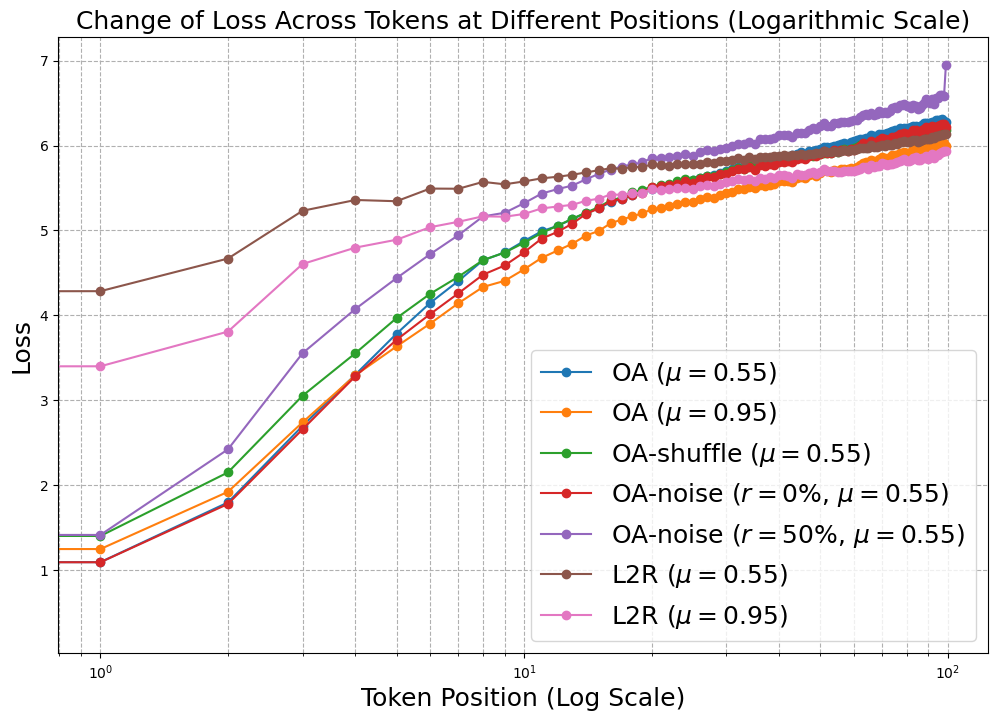

In [12]:
fname11 = f'{DIR}/mage-llm-consecutive/losses.json'
fname12 = f'{DIR}/mage-llm-consecutive-mu95/losses.json'
fname21 = f'{DIR}/mage-llm/losses.json'
fname31 = f'{DIR}/mage-llm-shuffle/losses.json'
fname22 = f'{DIR}/mage-llm-mu95/losses.json'
fname41 = f'{DIR}/mage-llm-replace/losses.json'
fname42 = f'{DIR}/mage-llm-replace-prob0.5/losses.json'
draw_curve([fname21, fname22, fname31, fname41, fname42, fname11, fname12], [r'OA ($\mu=0.55$)', r'OA ($\mu=0.95$)', r'OA-shuffle ($\mu=0.55$)', r'OA-noise ($r=0\%$, $\mu=0.55$)', r'OA-noise ($r=50\%$, $\mu=0.55$)', r'L2R ($\mu=0.55$)', r'L2R ($\mu=0.95$)'])

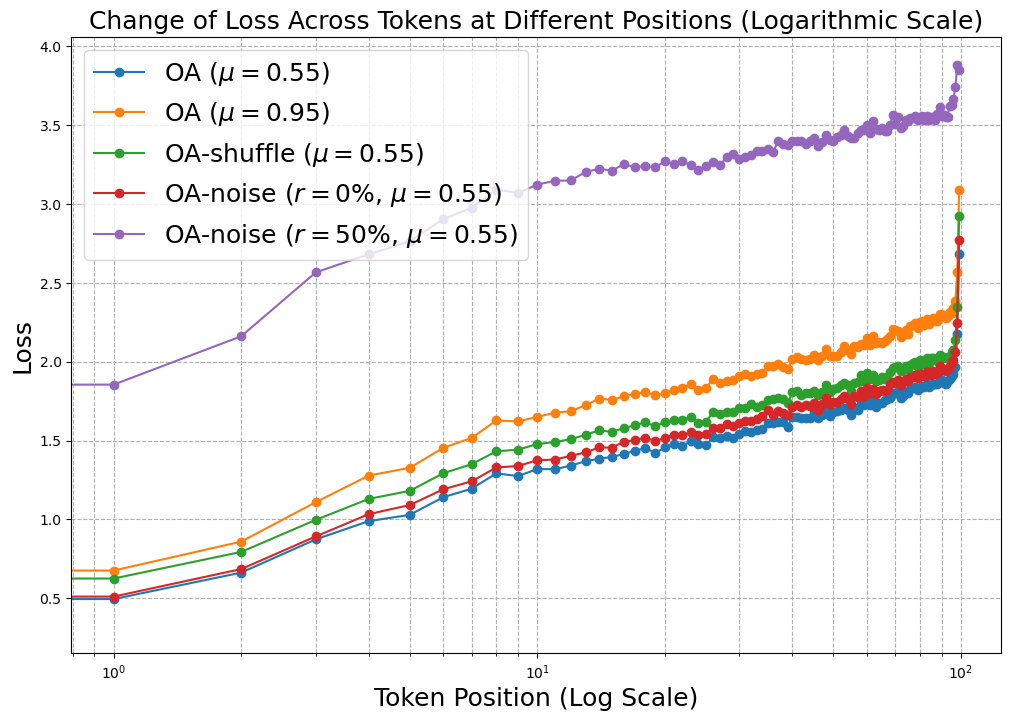

In [13]:
# fname11 = f'{DIR}/mage-llm-consecutive/losses_ratio0.5.json'
# fname12 = f'{DIR}/mage-llm-consecutive-mu95/losses_ratio0.5.json'
# fname21 = f'{DIR}/mage-llm/losses_ratio0.5.json'
# fname31 = f'{DIR}/mage-llm-shuffle/losses_ratio0.5.json'
# fname22 = f'{DIR}/mage-llm-mu95/losses_ratio0.5.json'
# draw_curve([fname11, fname12, fname21, fname22, fname31], [r'L2R ($\mu=0.55$)', r'L2R ($\mu=0.95$)', r'OA ($\mu=0.55$)', r'OA ($\mu=0.95$)', 'OA-shuffle'])

fname21 = f'{DIR}/mage-llm/losses_ratio0.5.json'
fname31 = f'{DIR}/mage-llm-shuffle/losses_ratio0.5.json'
fname22 = f'{DIR}/mage-llm-mu95/losses_ratio0.5.json'
fname41 = f'{DIR}/mage-llm-replace/losses_ratio0.5.json'
fname42 = f'{DIR}/mage-llm-replace-prob0.5/losses_ratio0.5.json'
# draw_curve([fname21, fname22, fname31, fname11, fname12, fname41], [r'OA ($\mu=0.55$)', r'OA ($\mu=0.95$)', 'OA-shuffle', r'L2R ($\mu=0.55$)', r'L2R ($\mu=0.95$)', r'OA-noise ($0\%$)'])
draw_curve([fname21, fname22, fname31, fname41, fname42], [r'OA ($\mu=0.55$)', r'OA ($\mu=0.95$)', r'OA-shuffle ($\mu=0.55$)', r'OA-noise ($r=0\%$, $\mu=0.55$)', r'OA-noise ($r=50\%$, $\mu=0.55$)'])

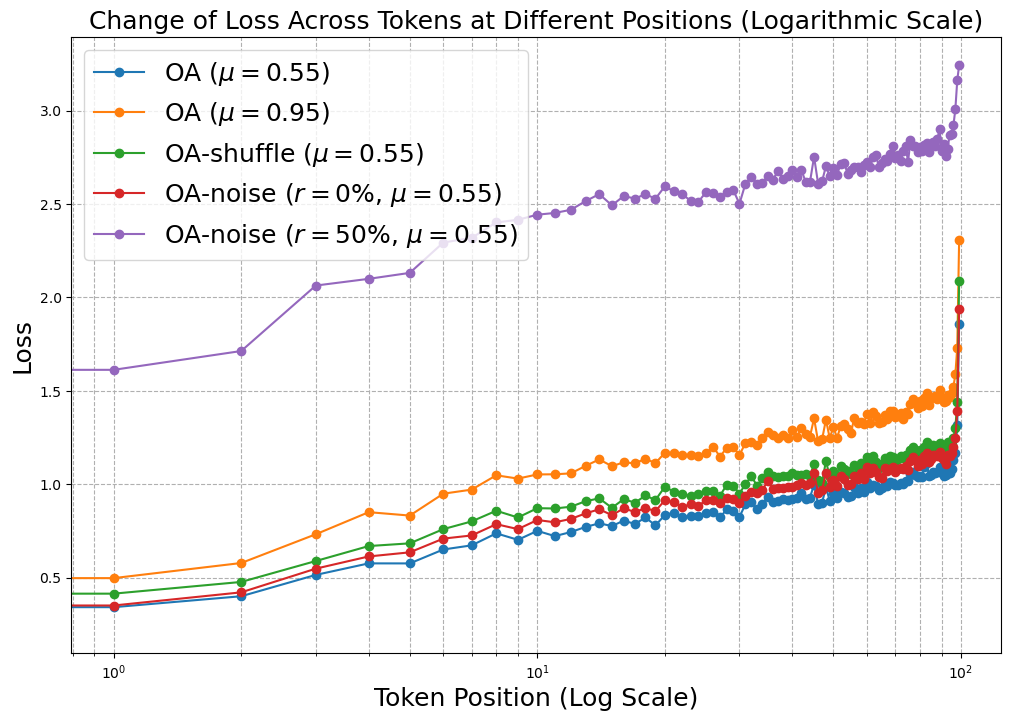

In [16]:
# fname11 = f'{DIR}/mage-llm-consecutive/losses_ratio0.25.json'
# fname12 = f'{DIR}/mage-llm-consecutive-mu95/losses_ratio0.25.json'
# fname21 = f'{DIR}/mage-llm/losses_ratio0.25.json'
# fname31 = f'{DIR}/mage-llm-shuffle/losses_ratio0.25.json'
# fname22 = f'{DIR}/mage-llm-mu95/losses_ratio0.25.json'
# draw_curve([fname11, fname12, fname21, fname22, fname31], [r'L2R ($\mu=0.55$)', r'L2R ($\mu=0.95$)', r'OA ($\mu=0.55$)', r'OA ($\mu=0.95$)', 'OA-shuffle'])

fname21 = f'{DIR}/mage-llm/losses_ratio0.25.json'
fname31 = f'{DIR}/mage-llm-shuffle/losses_ratio0.25.json'
fname22 = f'{DIR}/mage-llm-mu95/losses_ratio0.25.json'
fname41 = f'{DIR}/mage-llm-replace/losses_ratio0.25.json'
fname42 = f'{DIR}/mage-llm-replace-prob0.5/losses_ratio0.25.json'
draw_curve([fname21, fname22, fname31, fname41, fname42], [r'OA ($\mu=0.55$)', r'OA ($\mu=0.95$)', r'OA-shuffle ($\mu=0.55$)', r'OA-noise ($r=0\%$, $\mu=0.55$)', r'OA-noise ($r=50\%$, $\mu=0.55$)'])

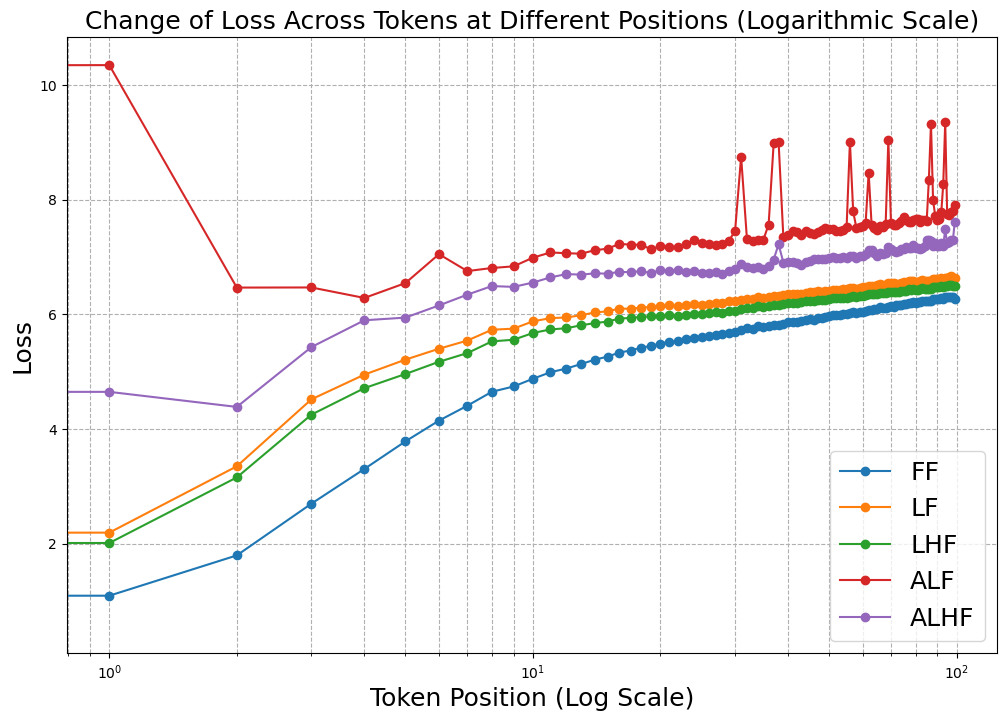

In [14]:
fname1 = f'{DIR}/mage-llm/losses.json'
fname2 = f'{DIR}/finallayer/mage-llm-finallayer/losses.json'
fname3 = f'{DIR}/finallayer/mage-llm-finallayer_lmhead/losses.json'
fname4 = f'{DIR}/addfinallayer/mage-llm-addfinallayer/losses.json'
fname5 = f'{DIR}/addfinallayer/mage-llm-addfinallayer_lmhead/losses.json'
draw_curve([fname1, fname2, fname3, fname4, fname5], ['FF', 'LF', 'LHF', 'ALF', 'ALHF'])

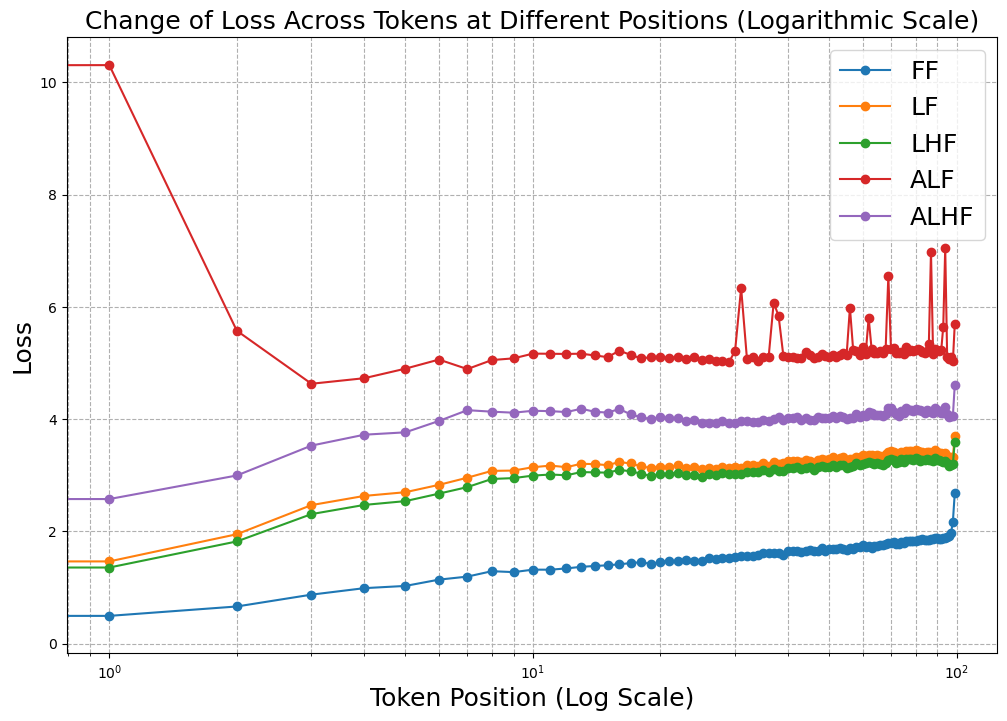

In [17]:
fname1 = f'{DIR}/mage-llm/losses_ratio0.5.json'
fname2 = f'{DIR}/finallayer/mage-llm-finallayer/losses_ratio0.5.json'
fname3 = f'{DIR}/finallayer/mage-llm-finallayer_lmhead/losses_ratio0.5.json'
fname4 = f'{DIR}/addfinallayer/mage-llm-addfinallayer/losses_ratio0.5.json'
fname5 = f'{DIR}/addfinallayer/mage-llm-addfinallayer_lmhead/losses_ratio0.5.json'
draw_curve([fname1, fname2, fname3, fname4, fname5], ['FF', 'LF', 'LHF', 'ALF', 'ALHF'])

In [76]:
decoding_tracks = json_load(f'{DIR}/mage-llm/decoding_tracks_step_sample3.json')

In [77]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(
    'mistralai/Mistral-7B-Instruct-v0.2',
)

In [79]:
idx = 3
print(decoding_tracks['outputs'][idx])
for i in range(len(decoding_tracks['tracks'][idx])):
    # if i < 50: continue
    start_idx = min(decoding_tracks['tracks'][idx][i][1])
    end_idx = max(decoding_tracks['tracks'][idx][i][1])
    print(tokenizer.decode([decoding_tracks['tracks'][idx][i][0][decoding_tracks['tracks'][idx][i][1].index(x)] if x in decoding_tracks['tracks'][idx][i][1] else 583 for x in range(start_idx, end_idx + 1)]))
    # print(''.join([tokenizer.decode([decoding_tracks['tracks'][idx][i][0][decoding_tracks['tracks'][idx][i][1].index(x)]]) if x in decoding_tracks['tracks'][idx][i][1] else '_' for x in range(start_idx, end_idx + 1)]))
    # print(decoding_tracks['tracks'][idx][i])

[INST] Are those all the equations in our model? [/INST] I cannot definitively answer that question without referring knowing which specific model you are referring to. The equations of a model can a simple range of equations and equations, and a complex and equations. The equations model. If you could provide me the name of the model or description, I could a look list of the equations, but let me to to to the model.. If,, the the list of all all equations in the model, including the model, a model is not
cannot
cannot definit
I cannot definit _ answer
I cannot definit _ answer _ question without _ knowing
I cannot definitively answer _ question without _ knowing which specific
I cannot definitively answer that question without _ knowing which specific model you
I cannot definitively answer that question without referring knowing which specific model you are _ to
I cannot definitively answer that question without referring knowing which specific model you are referring to. _ _ _ _ mod

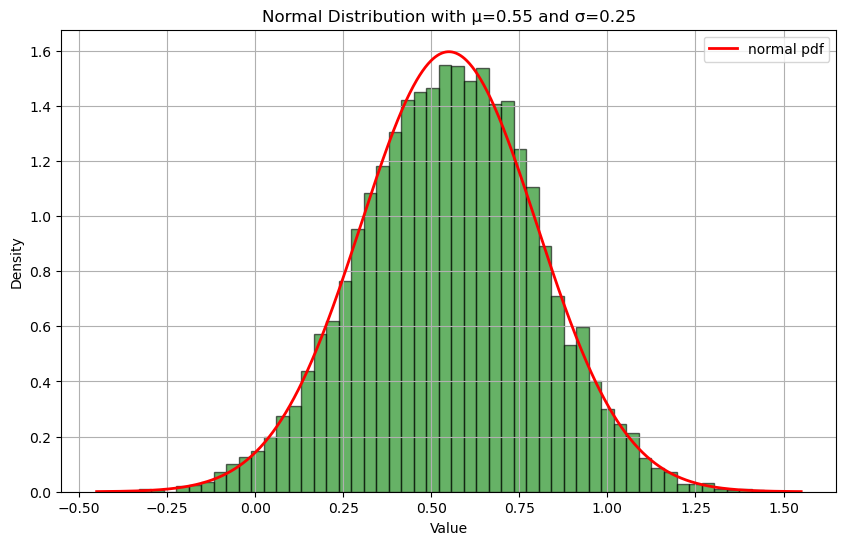

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the normal distribution
mu = 0.55
std = 0.25

# Generate sample values
samples = np.random.normal(mu, std, 10000)

# Plot the histogram of the samples
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g', edgecolor='black')

# Plot the theoretical PDF
x = np.linspace(mu - 4*std, mu + 4*std, 1000)
plt.plot(x, norm.pdf(x, mu, std), 'r-', lw=2, label='normal pdf')

plt.title(f'Normal Distribution with μ={mu} and σ={std}')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()
